In [21]:
class der_LR:
    def __init__(self):
        self.b = None
        self.m = None
        
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())
            den += (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
            
            self.m = num / den
            self.b = y_train.mean() - (self.m*X_train.mean())
            
        print(self.b)
        print(self.m)
        
    def predict(self, X_test):
        print(X_test)
        return self.m*X_test + self.b

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('placement_package.csv')

In [5]:
df.sample(5)

,cgpa,package
178,8.15,3.63
177,7.09,3.64
56,5.84,2.74
170,6.22,2.87
191,7.28,3.48


In [6]:
X = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
lr = der_LR()

In [23]:
lr.fit(X_train,y_train)

[-0.89611192]
[0.55795197]


In [20]:
print(lr.predict(X_test[0]))

[8.58]
[3.89111601]


In [26]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('placement_package.csv')
df.sample(5)

,cgpa,package
150,6.30,2.73
179,7.14,3.03
106,6.13,2.19
86,7.61,2.77
130,6.68,2.49


Text(0, 0.5, 'Package in LPA')

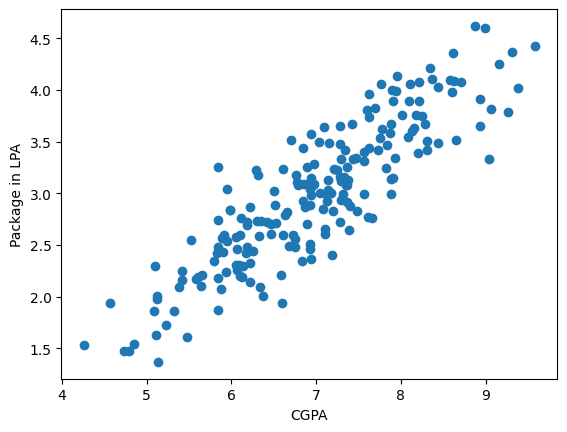

In [27]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')


In [28]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

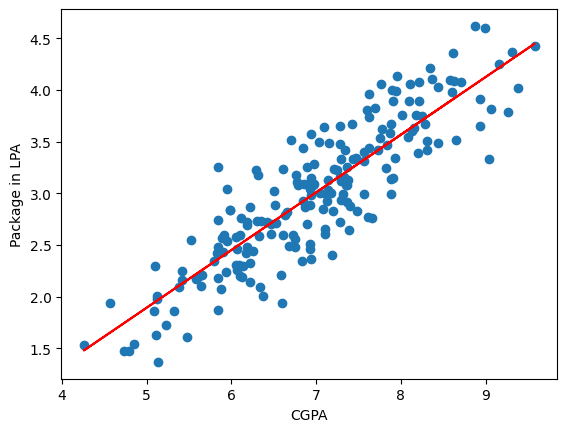

In [33]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [35]:
y_pred = lr.predict(X_test)

In [37]:
print("Mean Absolute Error: ", mean_absolute_error(y_pred,y_test))

Mean Absolute Error:  0.2884710931878175


In [38]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.12129235313495527


In [39]:
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  0.34827051717731616


In [42]:
print("R2 Score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score:  0.780730147510384


In [41]:
X_test.shape

(40, 1)

In [43]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [52]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa', 'random_feature', 'package']]

Text(0, 0.5, 'Package in LPA')

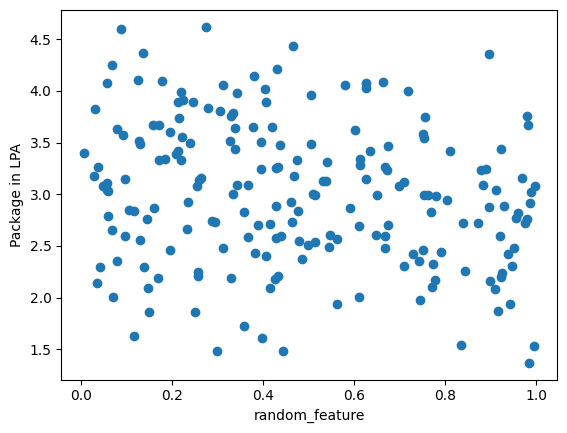

In [53]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package in LPA')

In [74]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]
X.shape
# y.shape

(200, 2)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred = lr.predict(X_test)

In [78]:
print("R2 Score:", r2_score(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score: 0.7825458046046357


In [79]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7707915237724539

In [ ]:

new_df = df.copy()
new_df['iq'] = new_df['package'] + (np.random.randint(-12,12,200)/10)
new_df = new_df[['cgpa','iq','package']]
print(new_df)

     cgpa    iq  package
0    6.89  4.26     3.26
1    5.12  2.18     1.98
2    7.82  3.75     3.25
3    7.42  3.77     3.67
4    6.94  4.57     3.57
..    ...   ...      ...
195  6.93  1.76     2.46
196  5.89  2.17     2.57
197  7.21  4.04     3.24
198  7.63  3.46     3.96
199  6.22  1.93     2.33

[200 rows x 3 columns]


Text(0, 0.5, 'Package in LPA')

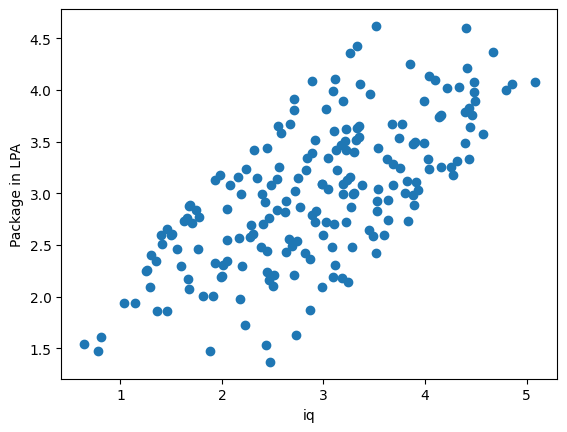

In [93]:
plt.scatter(new_df['iq'],new_df['package'])
plt.xlabel('iq')
plt.ylabel('Package in LPA')

In [ ]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]


0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [112]:
print("R2 Score:", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score: 0.8245629208208217


In [115]:
1-((1-r2)*(40-1)/(40-1-2))


0.815079835459785

Text(0, 0.5, 'Package in LPA')

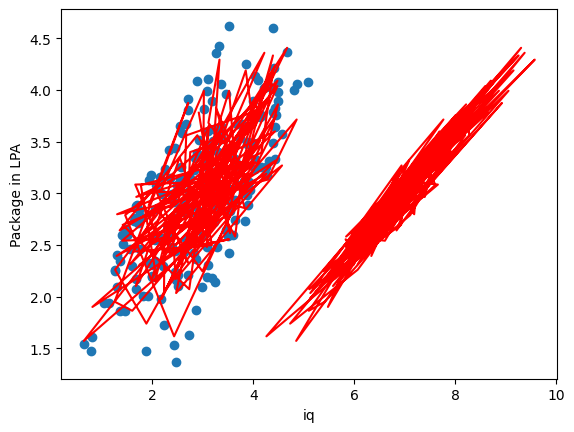

In [121]:
plt.scatter(new_df['iq'],new_df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('iq')
plt.ylabel('Package in LPA')